# Deming Regression
-------------------------------

This function shows how to use TensorFlow to solve linear Deming regression.

$y = Ax + b$

We will use the iris data, specifically:

y = Sepal Length and x = Petal Width.

Demming regression is also called total least squares, in which we minimize the shortest distance from the predicted line and the actual (x,y) points.

If least squares linear regression minimizes the vertical distance to the line, Deming regression minimizes the total distance to the line.  This type of regression minimizes the error in the y values and the x values.  See the below figure for a comparison.

<img src="../images/05_demming_vs_linear_reg.png" width="512">

To implement this in TensorFlow, we start by loading the necessary libraries.

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,matplotlib,nltk,sklearn,tensorflow

/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Gopala KR 
last updated: 2018-08-13 

CPython 3.5.4
IPython 6.2.1

watermark 1.6.1
numpy 1.15.0
matplotlib 2.1.1
nltk 3.2.1
sklearn 0.19.1
tensorflow 1.1.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

Start a computational graph session:

In [3]:
sess = tf.Session()

# Set a random seed
tf.set_random_seed(42)
np.random.seed(42)

We load the iris data.

In [4]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data]) # Petal Width
y_vals = np.array([y[0] for y in iris.data]) # Sepal Length

Next we declare the batch size, model placeholders, model variables, and model operations.

In [5]:
# Declare batch size
batch_size = 125

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

For the demming loss, we want to compute:

$$ \frac{\left| A \cdot x + b - y \right|}{\sqrt{A^{2} + 1}} $$

Which will give us the shortest distance between a point (x,y) and the predicted line, $A \cdot x + b$.

In [6]:
# Declare Demming loss function
demming_numerator = tf.abs(tf.subtract(tf.add(tf.matmul(x_data, A), b), y_target))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

Next we declare the optimization function and initialize all model variables.

In [7]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.25)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Now we train our Demming regression for 250 iterations.

In [8]:
# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[3.0726147]] b = [[1.7809943]]
Loss = 0.47351113
Step #200 A = [[2.4791968]] b = [[2.522905]]
Loss = 0.41200355
Step #300 A = [[1.7441045]] b = [[3.6184285]]
Loss = 0.37118953
Step #400 A = [[1.0046823]] b = [[4.5442805]]
Loss = 0.26205793
Step #500 A = [[0.96397024]] b = [[4.6049953]]
Loss = 0.24395348
Step #600 A = [[0.9685904]] b = [[4.635706]]
Loss = 0.2640345
Step #700 A = [[1.0214032]] b = [[4.6014485]]
Loss = 0.28518897
Step #800 A = [[1.0011189]] b = [[4.5969176]]
Loss = 0.27670062
Step #900 A = [[1.0413957]] b = [[4.609023]]
Loss = 0.29095763
Step #1000 A = [[0.99908054]] b = [[4.6551456]]
Loss = 0.25260982
Step #1100 A = [[1.0123377]] b = [[4.635041]]
Loss = 0.279366
Step #1200 A = [[0.9765105]] b = [[4.576026]]
Loss = 0.25286523
Step #1300 A = [[1.0068183]] b = [[4.5819325]]
Loss = 0.25535065
Step #1400 A = [[1.0399678]] b = [[4.6191072]]
Loss = 0.25641337
Step #1500 A = [[0.9664051]] b = [[4.5969276]]
Loss = 0.24788947


Retrieve the optimal coefficients (slope and intercept).

In [9]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

Here is matplotlib code to plot the best fit Demming regression line and the Demming Loss.

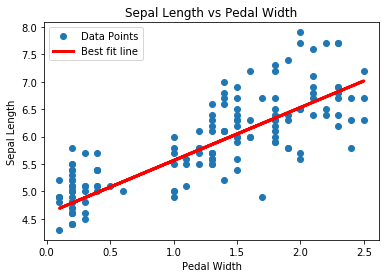

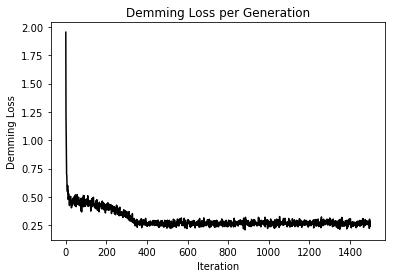

In [10]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Demming Loss per Generation')
plt.xlabel('Iteration')
plt.ylabel('Demming Loss')
plt.show()